In [1]:
#Load in the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
rs = np.random.RandomState(42)
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load in the data and view the head
df = pd.read_csv('data.csv')
df.head()

,Date,Values
0,3/1/2014,45.868
1,3/2/2014,47.606
2,3/3/2014,42.580
3,3/4/2014,46.030
4,3/5/2014,44.992


In [3]:
#Explore the data types
df.dtypes

Date       object
Values    float64
dtype: object

In [4]:
#Changing the data types
df['Date'] =pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Values           float64
dtype: object

In [5]:
df

,Date,Values
0,2014-03-01,45.868
1,2014-03-02,47.606
2,2014-03-03,42.580
3,2014-03-04,46.030
4,2014-03-05,44.992
...,...,...
1763,2018-12-28,44.178
1764,2018-12-29,43.526
1765,2018-12-30,43.944
1766,2018-12-31,47.344


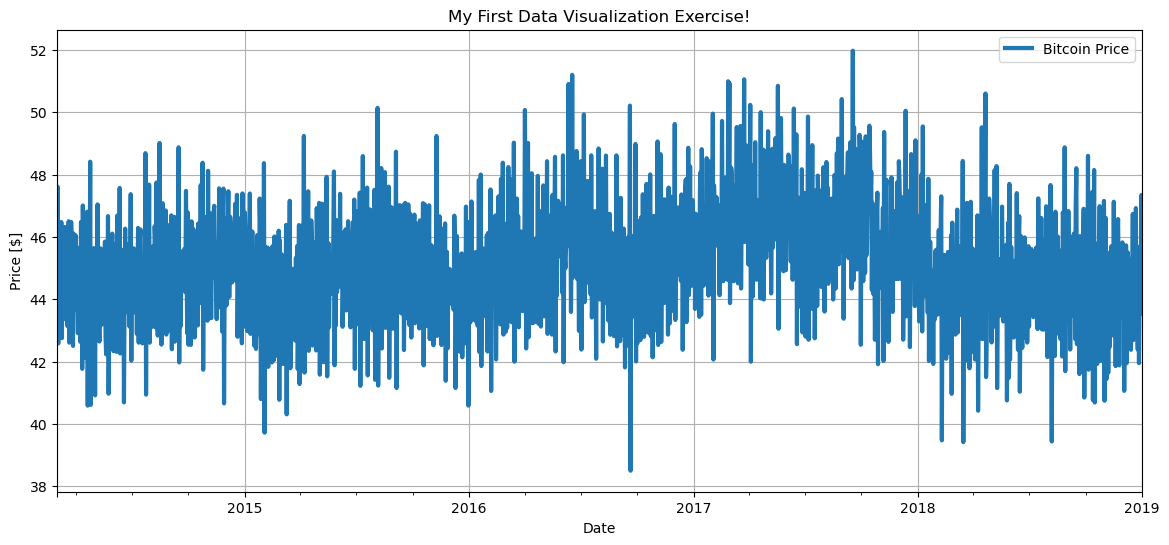

In [6]:
df.plot(x = 'Date', y = 'Values', label = 'Bitcoin Price', linewidth = 3, figsize = (14, 6));
plt.ylabel('Price [$]')
plt.title('My First Data Visualization Exercise!')
plt.legend(loc = "upper right")
plt.grid()

In [7]:
#set the index to the date
df = df.set_index('Date')

In [8]:
df

,Values
Date,
2014-03-01,45.868
2014-03-02,47.606
2014-03-03,42.580
2014-03-04,46.030
2014-03-05,44.992
...,...
2018-12-28,44.178
2018-12-29,43.526
2018-12-30,43.944


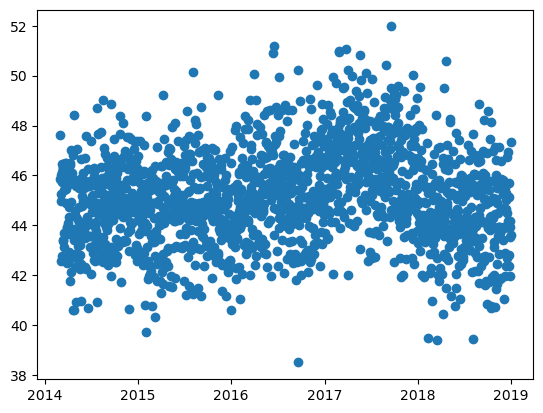

In [9]:
#visualize the data
plt.scatter(x=df.index,y=df['Values'])


In [10]:
#summary statistics
df.describe()

,Values
count,1768.000000
mean,45.123334
std,1.879119
min,38.498000
25%,43.882500
50%,45.000000
75%,46.341500
max,51.972000


In [11]:
clf = IsolationForest(contamination = 0.1)
clf.fit(df)
predictions = clf.predict(df)

In [12]:
import numpy as np
anom_index = np.where(predictions < 0)
anom_index

(array([  41,   50,   54,   55,   62,   84,  109,  121,  144,  145,  167,
         198,  199,  237,  238,  272,  332,  337,  338,  344,  350,  362,
         368,  374,  380,  392,  395,  402,  403,  428,  434,  440,  452,
         485,  494,  498,  506,  518,  522,  523,  541,  552,  553,  597,
         618,  633,  649,  670,  691,  707,  726,  735,  744,  745,  762,
         767,  798,  811,  824,  825,  833,  839,  846,  853,  858,  870,
         882,  894,  911,  925,  933,  934,  942,  943,  978,  983, 1006,
        1028, 1031, 1050, 1058, 1062, 1068, 1083, 1093, 1095, 1107, 1110,
        1113, 1119, 1123, 1129, 1130, 1134, 1137, 1146, 1150, 1154, 1156,
        1158, 1165, 1168, 1170, 1174, 1179, 1184, 1191, 1192, 1197, 1200,
        1204, 1223, 1230, 1248, 1253, 1270, 1272, 1275, 1278, 1288, 1292,
        1296, 1298, 1302, 1307, 1308, 1311, 1312, 1314, 1317, 1323, 1324,
        1337, 1346, 1347, 1371, 1382, 1391, 1398, 1410, 1420, 1427, 1441,
        1457, 1475, 1476, 1483, 1486, 

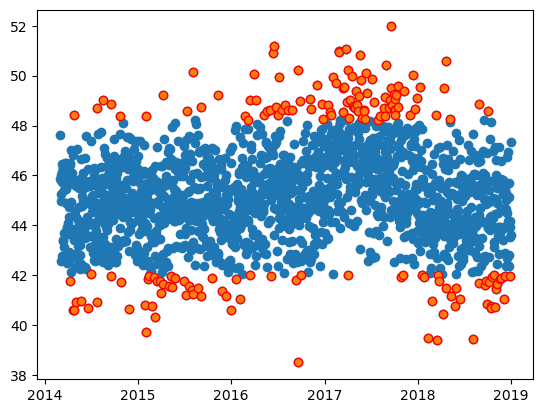

In [20]:
plt.scatter(x=df.index,y=df['Values'])
plt.scatter(df.index[anom_index],df.values[anom_index,0] , edgecolors = "r")